# Plot ESTIMATE immune scores

Script related to figure 1f

### Aim:
- Plot ESTIMATE immune scores

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [4]:
file_keys = home + "/Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt"

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [5]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


### Define sample colours

In [6]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [7]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [8]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


In [9]:
sample_labels.loc[:,['Case_mRNA',
                     'Site',
                     'Colour',
                     'Site_marker']].head()

,Case_mRNA,Site,Colour,Site_marker
Well,,,,
A01,10,omentum,#ff7f00,^
A02,10,omentum,#ff7f00,^
A03,10,other,#ff7f00,s
A04,10,ovary,#ff7f00,o
A05,10,ovary,#ff7f00,o


## Load ImmuneScore Data

### TreatmentNaive ESTIMATEs

In [11]:
TxNaive_file = home + "/Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt"

TxNaive_ESTIMATES = pd.read_csv(TxNaive_file,
                                skiprows=2,
                                sep='\t',
                                index_col='NAME').iloc[:,1:].transpose()

In [12]:
TxNaive_ESTIMATES.head()

NAME,StromalScore,ImmuneScore,ESTIMATEScore,TumorPurity
A01,213.898183,789.397143,1003.295326,0.730147
A02,441.185072,1103.963967,1545.149039,0.673548
A03,627.161634,996.569838,1623.731472,0.664978
A04,-257.879171,119.238243,-138.640928,0.833913
A05,-105.932457,354.124225,248.191767,0.801248


In [13]:
headers = ['Case_mRNA','Site','Colour','Site_marker']

TxNaive_ImmuneScore = pd.concat([TxNaive_ESTIMATES.ImmuneScore,
                                 sample_labels.loc[:,headers]],
                                 axis=1)

In [14]:
TxNaive_ImmuneScore.rename(columns={'Case_mRNA':'Data'},
                           inplace=True)

In [15]:
TxNaive_ImmuneScore.head()

,ImmuneScore,Data,Site,Colour,Site_marker
Well,,,,,
A01,789.397143,10,omentum,#ff7f00,^
A02,1103.963967,10,omentum,#ff7f00,^
A03,996.569838,10,other,#ff7f00,s
A04,119.238243,10,ovary,#ff7f00,o
A05,354.124225,10,ovary,#ff7f00,o


In [16]:
TxNaive_ImmuneScore.Site.value_counts()

ovary      21
omentum    11
other       6
Name: Site, dtype: int64

### TCGA OV ESTIMATEs

In [18]:
TCGAov_file = home + "/Data/1/TCGAov_RNAseq_filtered_ESTIMATE.txt"

TCGAov_ESTIMATES = pd.read_csv(TCGAov_file,
                               skiprows=2,
                               sep='\t',
                               index_col='NAME').iloc[:,1:].transpose()

In [19]:
TCGAov_ESTIMATES.head()

NAME,StromalScore,ImmuneScore,ESTIMATEScore
TCGA.04.1348.01,-750.107248,829.829565,79.722317
TCGA.04.1357.01,-33.645571,1743.313601,1709.668030
TCGA.04.1362.01,-1233.143230,-395.854756,-1628.997986
TCGA.04.1364.01,-1813.901326,-1748.400131,-3562.301457
TCGA.04.1365.01,-924.334966,497.225037,-427.109929


In [20]:
TCGAov_ESTIMATES['Sample_ID'] = TCGAov_ESTIMATES.index.str.replace('.','-').str[:-3]

In [21]:
TCGAov_ESTIMATES.head()

NAME,StromalScore,ImmuneScore,ESTIMATEScore,Sample_ID
TCGA.04.1348.01,-750.107248,829.829565,79.722317,TCGA-04-1348
TCGA.04.1357.01,-33.645571,1743.313601,1709.668030,TCGA-04-1357
TCGA.04.1362.01,-1233.143230,-395.854756,-1628.997986,TCGA-04-1362
TCGA.04.1364.01,-1813.901326,-1748.400131,-3562.301457,TCGA-04-1364
TCGA.04.1365.01,-924.334966,497.225037,-427.109929,TCGA-04-1365


In [22]:
TCGAov_ESTIMATES.set_index('Sample_ID', inplace=True)

### Add TCGA OV site data

In [24]:
TCGAovSite_file = home + "/Data/1/data_bcr_clinical_data_patient.txt"

TCGAov_clin_data = pd.read_csv(TCGAovSite_file,
                               sep='\t',
                               skiprows=4,
                               index_col='PATIENT_ID')

In [25]:
TCGAov_clin_data.shape

(586, 58)

In [26]:
TCGAov_clin_data.index[:5]

Index(['TCGA-04-1332', 'TCGA-04-1335', 'TCGA-04-1336', 'TCGA-04-1337',
       'TCGA-04-1338'],
      dtype='object', name='PATIENT_ID')

#### Append site info

In [27]:
TCGAov_ImmuneScore = pd.concat([TCGAov_ESTIMATES.ImmuneScore,
                                TCGAov_clin_data.TUMOR_TISSUE_SITE],
                               axis=1,
                               join='inner')

TCGAov_ImmuneScore.rename(columns={'TUMOR_TISSUE_SITE':'Site'},
                          inplace=True)

In [28]:
TCGAov_ImmuneScore['Site'] = TCGAov_ImmuneScore.Site.str.lower()

In [29]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

TCGAov_ImmuneScore['Site_marker'] = TCGAov_ImmuneScore['Site'].replace(sites,markers)

In [30]:
TCGAov_ImmuneScore['Data'] = 'TCGA_OV'

In [31]:
TCGAov_ImmuneScore['Colour'] = 'grey'

In [32]:
TCGAov_ImmuneScore.head()

,ImmuneScore,Site,Site_marker,Data,Colour
TCGA-04-1348,829.829565,ovary,o,TCGA_OV,grey
TCGA-04-1357,1743.313601,ovary,o,TCGA_OV,grey
TCGA-04-1362,-395.854756,ovary,o,TCGA_OV,grey
TCGA-04-1364,-1748.400131,ovary,o,TCGA_OV,grey
TCGA-04-1365,497.225037,ovary,o,TCGA_OV,grey


### Add Case Study data

In [34]:
CaseStudy_file = home + "/Data/1/CaseStudy_ESTIMATE.txt"

CaseStudy_ESTIMATES = pd.read_csv(CaseStudy_file,
                                  skiprows=2,
                                  sep='\t',
                                  index_col='NAME').iloc[:,1:].transpose()

In [35]:
CaseStudy_ESTIMATES['Site'] = CaseStudy_ESTIMATES.index

In [36]:
CaseStudy_ESTIMATES.head()

NAME,StromalScore,ImmuneScore,ESTIMATEScore,TumorPurity,Site
liver,275.079190,678.327109,953.406298,0.735131,liver
primary,-74.654293,128.425490,53.771197,0.817995,primary
ruq,853.906808,1023.109208,1877.016015,0.636757,ruq
spleen,592.826879,1186.727065,1779.553945,0.647722,spleen
vagcuff,377.399954,356.856246,734.256200,0.756555,vagcuff


In [37]:
CaseStudy_ImmuneScore = CaseStudy_ESTIMATES[['ImmuneScore',
                                             'Site']]

In [38]:
CaseStudy_ImmuneScore.head()

NAME,ImmuneScore,Site
liver,678.327109,liver
primary,128.425490,primary
ruq,1023.109208,ruq
spleen,1186.727065,spleen
vagcuff,356.856246,vagcuff


In [39]:
CaseStudy_sites = list(CaseStudy_ImmuneScore.Site)

Class_sites = []
for site in CaseStudy_sites:
    
    if site == 'primary':
        Class_sites.append('ovary')
    else:
        Class_sites.append('other')

CaseStudy_ImmuneScore['Site'] = CaseStudy_ImmuneScore['Site'].replace(CaseStudy_sites,
                                                                   Class_sites)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [40]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

CaseStudy_ImmuneScore['Site_marker'] = CaseStudy_ImmuneScore['Site'].replace(sites,markers)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
CaseStudy_ImmuneScore['Data'] = 'CaseStudy'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
CaseStudy_ImmuneScore['Colour'] = 'k'

In [43]:
CaseStudy_ImmuneScore.head()

NAME,ImmuneScore,Site,Site_marker,Data,Colour
liver,678.327109,other,s,CaseStudy,k
primary,128.425490,ovary,o,CaseStudy,k
ruq,1023.109208,other,s,CaseStudy,k
spleen,1186.727065,other,s,CaseStudy,k
vagcuff,356.856246,other,s,CaseStudy,k


## Merge TCGA_OV, TxNaive, and Case Study

In [44]:
CaseStudy_ImmuneScore.head()

NAME,ImmuneScore,Site,Site_marker,Data,Colour
liver,678.327109,other,s,CaseStudy,k
primary,128.425490,ovary,o,CaseStudy,k
ruq,1023.109208,other,s,CaseStudy,k
spleen,1186.727065,other,s,CaseStudy,k
vagcuff,356.856246,other,s,CaseStudy,k


In [45]:
TCGAov_ImmuneScore.head()

,ImmuneScore,Site,Site_marker,Data,Colour
TCGA-04-1348,829.829565,ovary,o,TCGA_OV,grey
TCGA-04-1357,1743.313601,ovary,o,TCGA_OV,grey
TCGA-04-1362,-395.854756,ovary,o,TCGA_OV,grey
TCGA-04-1364,-1748.400131,ovary,o,TCGA_OV,grey
TCGA-04-1365,497.225037,ovary,o,TCGA_OV,grey


In [46]:
TxNaive_ImmuneScore.head()

,ImmuneScore,Data,Site,Colour,Site_marker
Well,,,,,
A01,789.397143,10,omentum,#ff7f00,^
A02,1103.963967,10,omentum,#ff7f00,^
A03,996.569838,10,other,#ff7f00,s
A04,119.238243,10,ovary,#ff7f00,o
A05,354.124225,10,ovary,#ff7f00,o


### Append dataframes

In [47]:
dfs = [CaseStudy_ImmuneScore,
       TxNaive_ImmuneScore,
       TCGAov_ImmuneScore]

dfs = pd.concat(dfs)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [48]:
dfs.head()

,Colour,Data,ImmuneScore,Site,Site_marker
liver,k,CaseStudy,678.327109,other,s
primary,k,CaseStudy,128.425490,ovary,o
ruq,k,CaseStudy,1023.109208,other,s
spleen,k,CaseStudy,1186.727065,other,s
vagcuff,k,CaseStudy,356.856246,other,s


In [49]:
dfs.tail()

,Colour,Data,ImmuneScore,Site,Site_marker
TCGA-61-2113,grey,TCGA_OV,273.545678,ovary,o
TCGA-OY-A56P,grey,TCGA_OV,-1827.914462,ovary,o
TCGA-OY-A56Q,grey,TCGA_OV,-1888.738012,ovary,o
TCGA-VG-A8LO,grey,TCGA_OV,-1189.501000,ovary,o
TCGA-WR-A838,grey,TCGA_OV,-1649.636238,ovary,o


In [50]:
len(dfs)

350

In [51]:
dfs[dfs.Data == 'TCGA_OV'].median()[0]

-71.81636840131459

In [52]:
dfs[dfs.Data == 'CaseStudy'].median()[0]

678.327108792188

In [53]:
medians = []
for data in set(dfs.Data):
    
    if data not in ['TCGA_OV','CaseStudy']:
    
        med = dfs[dfs.Data == data].median()[0]
    
        medians.append((data, med))

In [54]:
sorted_medians = sorted(medians, key=lambda x: x[1])
sorted_medians

[(6, -432.348262094897),
 (16, -18.4425285896238),
 (4, -17.4125652680702),
 (1, 122.63576851115351),
 (5, 211.3452727641485),
 (10, 571.7606839574751),
 (13, 638.447734197535),
 (17, 776.29663768968)]

In [55]:
sorted_samples = [sample[0] for sample in sorted_medians]
sorted_samples

[6, 16, 4, 1, 5, 10, 13, 17]

In [56]:
order = ['TCGA_OV']+sorted_samples+['CaseStudy']
order

['TCGA_OV', 6, 16, 4, 1, 5, 10, 13, 17, 'CaseStudy']

## Boxplots

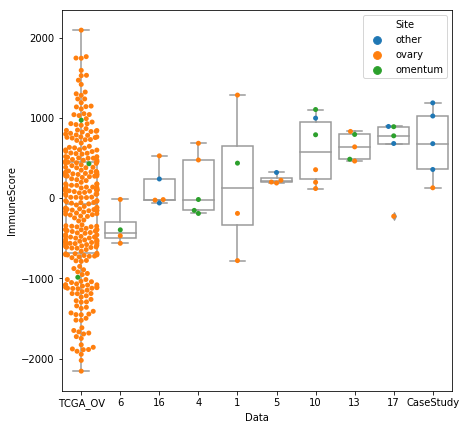

In [57]:
fig = plt.figure(figsize=(7,7))

sns.boxplot(x='Data',
            y='ImmuneScore',
            data=dfs,
            color='white',
            order=order)

sns.swarmplot(x='Data',
              y='ImmuneScore',
              data=dfs,
              order=order,
              hue='Site')

In [58]:
dfs["Data"].value_counts()

TCGA_OV      307
10             6
CaseStudy      5
17             5
16             5
13             5
4              5
6              4
5              4
1              4
Name: Data, dtype: int64

##### Change colours and markers in illustrator

### Save plot

In [59]:
ls ../../Figures/main/1/

OVCT_Fig_m1.pdf  OVCT_Fig_m1.png  README.md        panels/


In [61]:
FILE = "../../Figures/main/1/panels/1f_TreatmentNaive_ImmuneScores.pdf"

fig.savefig(FILE, bbox='tight')

# End script